In [221]:
%pylab
%matplotlib inline

import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import glob
from scipy.optimize import curve_fit

Using matplotlib backend: gtk3agg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


[ 0.95832761 -2.17363162  2.0344757   6.55371577  0.88395314  0.19341792]
39.74429578489388
61.8775725095775

[0.96828245 0.18086452 4.61402598 4.08174568 0.34049349]
44.45951341250354
62.90391068307322


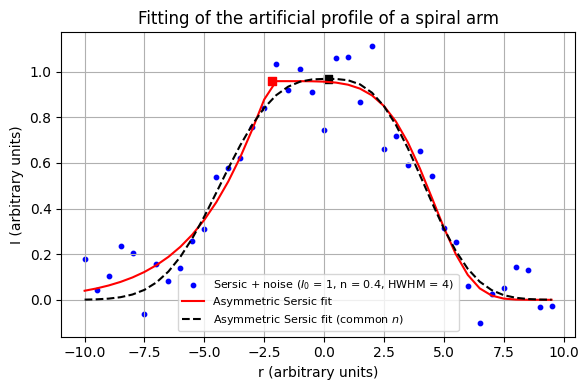

In [2]:
def asymm_ser(x, A, x0, wi, wo, ni, no):
    yi = A * np.exp(-np.log(2) * (np.abs((x - x0) / wi) ** (1 / ni)))
    yo = A * np.exp(-np.log(2) * (np.abs((x - x0) / wo) ** (1 / no)))
    y = np.where(x > x0, yo, yi)
    return y

def asymm_ser_cn(x, A, x0, wi, wo, n):
    yi = A * np.exp(-np.log(2) * (np.abs((x - x0) / wi) ** (1 / n)))
    yo = A * np.exp(-np.log(2) * (np.abs((x - x0) / wo) ** (1 / n)))
    y = np.where(x > x0, yo, yi)
    return y

np.random.seed(0)

x = np.arange(-10, 10, 0.5)
y = asymm_ser_cn(x, 1, 0, 4, 4, 0.4) + np.random.normal(0, 0.1, len(x))

p0 = (1.5, 1, 3, 3, 0.5, 0.5)
popt, pcov = curve_fit(asymm_ser, x, y, p0 = p0, maxfev = 2000)
print(popt)
y_fit = asymm_ser(x, *popt)
chisq = np.nansum(((y_fit - y) / 0.1) ** 2)
bic = chisq + (len(p0) * np.log(len(x)))
print(chisq)
print(bic)
print()

p0_cn = (1.5, 1, 3, 3, 0.5)
popt_cn, pcov_cn = curve_fit(asymm_ser_cn, x, y, p0 = p0_cn, maxfev = 2000)
print(popt_cn)
y_fit_cn = asymm_ser_cn(x, *popt_cn)
chisq_cn = np.nansum(((y_fit_cn - y) / 0.1) ** 2)
bic_cn = chisq_cn + (len(p0_cn) * np.log(len(x)))
print(chisq_cn)
print(bic_cn)

#print(np.random.get_state())
fig, ax = plt.subplots(figsize=[6,4])

ax.scatter(x, y, c = "b", s = 10, marker = "o", label = "Sersic + noise ($I_0$ = 1, n = 0.4, HWHM = 4)")

ax.plot(x, y_fit, c = "r", label = "Asymmetric Sersic fit")
ax.scatter(popt[1], asymm_ser(popt[1], *popt), c = "r", s = 40, marker = "s")

ax.plot(x, y_fit_cn, c = "k", ls = "--", label = "Asymmetric Sersic fit (common $n$)")
ax.scatter(popt_cn[1], asymm_ser_cn(popt_cn[1], *popt_cn), c = "k", s = 40, marker = "s")

ax.legend(fontsize=8)
ax.set_xlabel("r (arbitrary units)")
ax.set_ylabel("I (arbitrary units)")
ax.set_title("Fitting of the artificial profile of a spiral arm")
ax.grid(True)
plt.tight_layout()
plt.savefig("Asymmetric_Sersic_fitting_example")
plt.show()

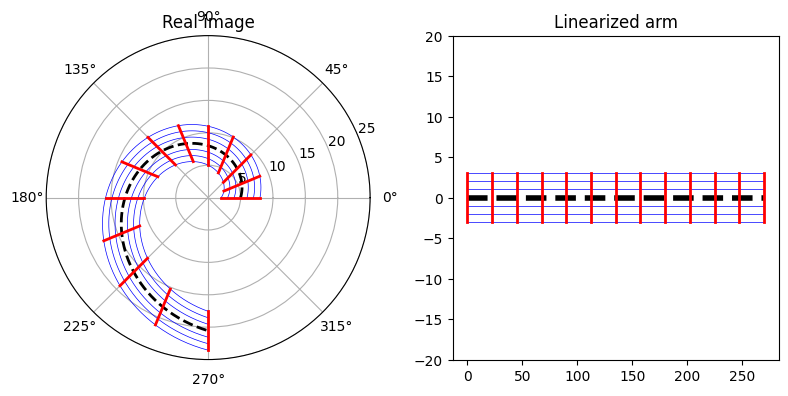

In [3]:
phi_base = np.linspace(0, np.pi * 1.5, 100)
r_base = 5 * np.exp(phi_base * 0.3)

plt.figure(figsize=[8,4])

ax = plt.subplot(1, 2, 1, projection="polar")
plt.plot(phi_base, r_base, lw=2, color = "k", ls = "--")
for i in [-3, -2, -1, 1, 2, 3]:
    plt.plot(phi_base, r_base + i, lw=0.5, color = "b")
for i in np.linspace(0, np.pi * 1.5, 13):
    r_i = 5 * np.exp(i * 0.3)
    plt.plot([i, i], [r_i - 3, r_i + 3], lw=2, color = "r")
ax.set_ylim(0, 25)
ax.set_title("Real image")

ax = plt.subplot(1, 2, 2)
plt.plot(np.degrees(phi_base), r_base - r_base, lw=4, color = "k", ls = "--")
for i in [-3, -2, -1, 1, 2, 3]:
    plt.plot(np.degrees(phi_base), r_base - r_base + i, lw=0.5, color = "b")
for i in np.linspace(0, np.pi * 1.5, 13):
    plt.plot([np.degrees(i), np.degrees(i)], [-3, 3], lw=2, color = "r")
ax.set_ylim(-20, 20)
ax.set_title("Linearized arm")

plt.tight_layout()
plt.show()

/tmp/ipykernel_4327/2969325405.py:29: RuntimeWarning: divide by zero encountered in divide
  I_perp_in = np.exp(-np.log(2) * np.power(np.abs(rho / w_in), ninv))
/tmp/ipykernel_4327/2969325405.py:30: RuntimeWarning: divide by zero encountered in divide
  I_perp_out = np.exp(-np.log(2) * np.power(np.abs(rho / w_out), ninv))
/tmp/ipykernel_4327/2969325405.py:78: RuntimeWarning: divide by zero encountered in log10
  ax1.imshow(np.log10(Ixy), vmin = -2, vmax = 0, cmap = cmap, origin = "lower")
/tmp/ipykernel_4327/2969325405.py:87: RuntimeWarning: divide by zero encountered in log10
  ax2.contour(np.log10(Ixy), np.linspace(-1.5, 0.3, 10), cmap = "inferno", linewidths = 0.5, label = "Isophotes")
/tmp/ipykernel_4327/2969325405.py:87: UserWarning: The following kwargs were not used by contour: 'label'
  ax2.contour(np.log10(Ixy), np.linspace(-1.5, 0.3, 10), cmap = "inferno", linewidths = 0.5, label = "Isophotes")


[-1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3 -0.1  0.1]


/tmp/ipykernel_4327/2969325405.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


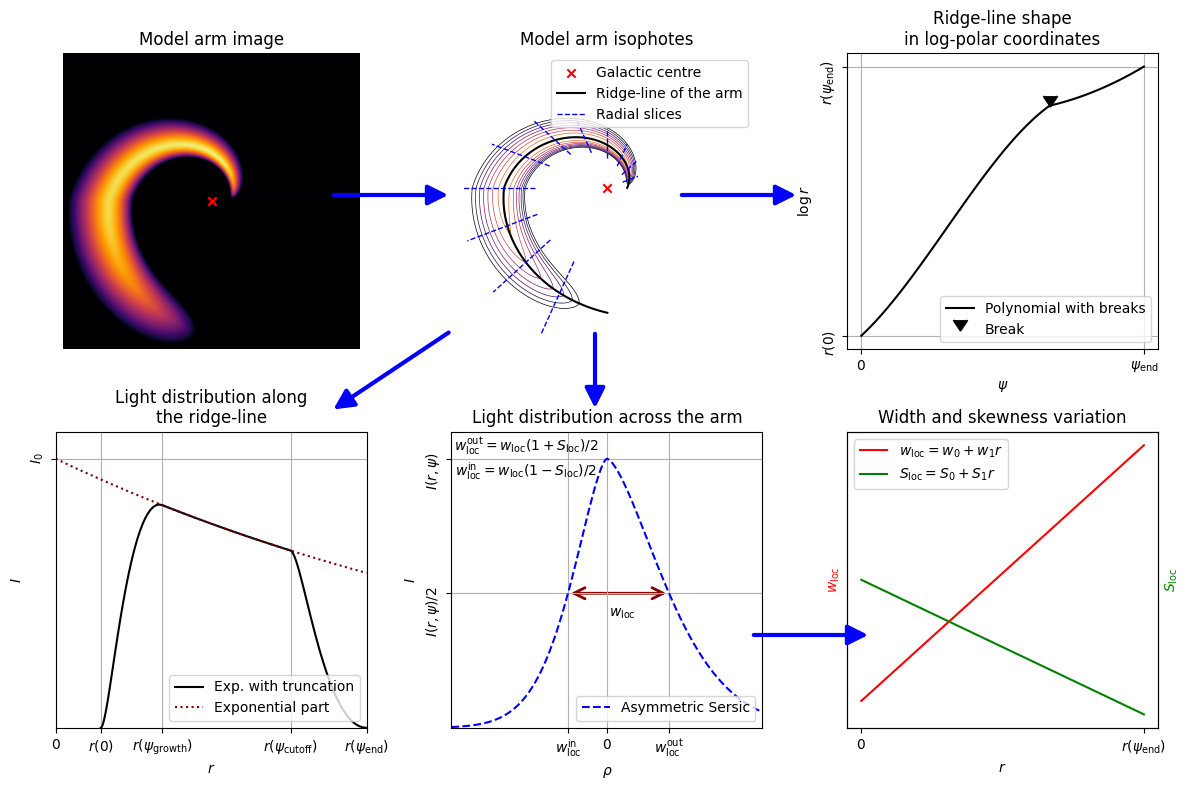

In [299]:
def from_polar(phi, r):
    x = r * np.cos(phi) + 150
    y = r * np.sin(phi) + 150
    return (y, x)

def rphi(phi):
    rin = 20 * np.exp(0.4 * phi + 0.15 * phi ** 2 - 0.035 * phi ** 3)
    rb = 20 * np.exp(0.4 * np.pi + 0.15 * np.pi ** 2 - 0.035 * np.pi ** 3)
    rout = rb * np.exp(0.1 * (phi - np.pi) + 0.05 * (phi - np.pi) ** 2)
    r = np.where(phi > np.pi, rout, rin)
    return r

def spiral_func(phi, r, rho, I0, ih, gr, co, st, end, w0, w1, S0, S1, n):
    ninv = 1 / n
    
    phstgr = np.clip((phi - st) / gr, 0, 1)
    endphico = np.clip((end - phi) / co, 0, 1)
    
    g_gr = 3 * np.power(phstgr, 2) - 2 * np.power(phstgr, 3)
    g_e = 3 * np.power(endphico, 2) - 2 * np.power(endphico, 3)
    hvs = g_gr * g_e
    I_parallel = I0 * np.exp(-(ih * r)) * hvs

    w_loc = w0 + w1 * r
    S_loc = S0 + S1 * r
    w_in = w_loc * (1 - S_loc) / 2
    w_out = w_loc * (1 + S_loc) / 2

    I_perp_in = np.exp(-np.log(2) * np.power(np.abs(rho / w_in), ninv))
    I_perp_out = np.exp(-np.log(2) * np.power(np.abs(rho / w_out), ninv))
    I_perp = np.where(rho > 0, I_perp_out, I_perp_in)

    I = I_parallel * I_perp
    return I

phi_1d = np.linspace(0, 1.5 * np.pi, 100)
r_1d = rphi(phi_1d)
y_1d, x_1d = from_polar(phi_1d, r_1d)

x_arr = np.arange(300) - 150
y_arr = np.arange(300) - 150
xv, yv = np.meshgrid(x_arr, y_arr)

r_arr = np.sqrt(xv ** 2 + yv ** 2)
phi_arr = np.arctan2(yv, xv)
phi_arr = np.where(phi_arr < 0, phi_arr + 2 * np.pi, phi_arr)
rphi_arr = rphi(phi_arr)
rho_arr = r_arr - rphi_arr


I0 = 1
ih = 0.004
gr = 0.5 * np.pi
co = 0.5 * np.pi
st = 0
end = 1.5 * np.pi
Ixy = spiral_func(phi_arr, r_arr, rho_arr, I0, ih, gr, co, st, end, 0, 0.2, 0.2, -0.002, 0.65)


"=========================="


fig = plt.figure(figsize=[12,8])
cmap = plt.get_cmap('inferno')
cmap.set_bad(color = 'k')

#ax1 = plt.subplot(2, 2, 1, projection="polar")
#ax1.plot(phi_1d, r_1d, lw=2, color = "k", ls = "--")
#for i in [-3, -2, -1, 1, 2, 3]:
#    ax1.plot(phi_1d, r_1d + i, lw=0.5, color = "b")
#for i in np.linspace(0, np.pi * 1.5, 13):
#    r_i = rphi(i)
#    ax1.plot([i, i], [r_i - 3, r_i + 3], lw=2, color = "r")
#ax1.set_ylim(0, 120)
#ax1.set_title("Real image")

ax1 = plt.subplot(2, 3, 1)
ax1.imshow(np.log10(Ixy), vmin = -2, vmax = 0, cmap = cmap, origin = "lower")
ax1.scatter(150, 150, marker = "x", c = "red")
ax1.set_axis_off()
ax1.set_title("Model arm image")
ax1.set_axis_off()

print(np.linspace(-1.5, 0.1, 9))

ax2 = plt.subplot(2, 3, 2)
ax2.contour(np.log10(Ixy), np.linspace(-1.5, 0.3, 10), cmap = "inferno", linewidths = 0.5, label = "Isophotes")
ax2.scatter(150, 150, marker = "x", c = "red", label = "Galactic centre")
ax2.plot(x_1d, y_1d, c = "k", label = "Ridge-line of the arm")
phi_sparse = np.linspace(np.pi / 8, 11 * np.pi / 8, 11)
for i in range(len(phi_sparse)):
    phi_i = phi_sparse[i]
    r_i = rphi(phi_i)
    rmin_i = r_i * 0.7
    rmax_i = r_i * 1.4
    y1, x1 = from_polar(phi_i, rmin_i)
    y2, x2 = from_polar(phi_i, rmax_i)
    if i == 0:
        ax2.plot([x1, x2], [y1, y2], lw=1, ls = "--", color = "b", label = "Radial slices")
    else:
        ax2.plot([x1, x2], [y1, y2], lw=1, ls = "--", color = "b")
ax2.set_box_aspect(1)
ax2.set_title("Model arm isophotes")
ax2.legend()
ax2.set_axis_off()

ax3 = plt.subplot(2, 3, 3)
ax3.plot(phi_1d, np.log10(r_1d), c = "k", label = "Polynomial with breaks")
ax3.scatter(np.pi, np.log10(rphi(np.pi)), c = "k", marker = 7, s = 100, label = "Break")
ax3.set_xticks([0, np.pi * 1.5])
ax3.set_xticklabels(["$0$", "$\\psi_\\text{end}$"])
ax3.set_yticks([np.log10(rphi(0)), np.log10(rphi(np.pi * 1.5))])
ax3.set_yticklabels(["$r(0)$", "$r(\\psi_\\text{end})$"])
ax3.tick_params(axis="y", labelrotation=90)
ax3.set_ylabel("$\\log r$")
ax3.set_xlabel("$\\psi$")
ax3.grid(True)
ax3.set_title("Ridge-line shape\nin log-polar coordinates")
ax3.legend()


phstgr = np.clip((phi_1d - st) / gr, 0, 1)
endphico = np.clip((end - phi_1d) / co, 0, 1)
g_gr = 3 * np.power(phstgr, 2) - 2 * np.power(phstgr, 3)
g_e = 3 * np.power(endphico, 2) - 2 * np.power(endphico, 3)
hvs = g_gr * g_e
I_parallel = I0 * np.exp(-(ih * r_1d)) * hvs
rext = np.linspace(0, rphi(1.5 * np.pi), 100)
I_exp = I0 * np.exp(-(ih * rext))

ax4 = plt.subplot(2, 3, 4)
ax4.plot(r_1d, I_parallel, c = "k", label = "Exp. with truncation")
ax4.plot(rext, I_exp, c = "maroon", ls = ":", label = "Exponential part")
ax4.set_xlim(0, rphi(1.5 * np.pi))
ax4.set_ylim(0, 1.1)
ax4.set_xticks([0, rphi(st), rphi(gr), rphi(end - co), rphi(end)])
ax4.set_xticklabels(["$0$", "$r(0)$", "$r(\\psi_\\text{growth})$", "$r(\\psi_\\text{cutoff})$", "$r(\\psi_\\text{end})$"])
ax4.set_yticks([I0])
ax4.set_yticklabels(["$I_0$"])
ax4.tick_params(axis="y", labelrotation=90)
ax4.set_ylabel("$I$")
ax4.set_xlabel("$r$")
ax4.grid(True)
ax4.set_title("Light distribution along\nthe ridge-line")
ax4.legend(loc = "lower right")


def asymm_ser_cn(x, A, x0, wi, wo, n):
    yi = A * np.exp(-np.log(2) * (np.abs((x - x0) / wi) ** (1 / n)))
    yo = A * np.exp(-np.log(2) * (np.abs((x - x0) / wo) ** (1 / n)))
    y = np.where(x > x0, yo, yi)
    return y

rho_arr = np.arange(-10, 10, 0.1)
I_perp_arr = asymm_ser_cn(rho_arr, 1, 0, 2.5, 4, 0.65)

ax5 = plt.subplot(2, 3, 5)
ax5.plot(rho_arr, I_perp_arr, c = "b", ls = "--", label = "Asymmetric Sersic")
ax5.set_xlim(-10, 10)
ax5.set_ylim(0, 1.1)
ax5.set_xticks([-2.5, 0, 4])
ax5.add_patch(patches.FancyArrowPatch((-2.5, 0.5), (4, 0.5), arrowstyle='<->', ec = "maroon", lw = 2, mutation_scale=20))
ax5.text(1, 0.45, "$w_\\text{loc}$", horizontalalignment="center", verticalalignment="top")
#ax5.text(5.5, 0.95,
#         "$S_\\text{loc} = \\frac{w_\\text{loc}^\\text{out} - w_\\text{loc}^\\text{in}}{w_\\text{loc}^\\text{out} + w_\\text{loc}^\\text{in}}$",
#         horizontalalignment="center", verticalalignment="center", fontsize = 14)
ax5.text(-5.2, 1,
         "$w_\\text{loc}^\\text{out} = w_\\text{loc} (1 + S_\\text{loc}) / 2$\n$w_\\text{loc}^\\text{in} = w_\\text{loc} (1 - S_\\text{loc}) / 2$",
         horizontalalignment="center", verticalalignment="center")
ax5.set_xticklabels(["$w_\\text{loc}^\\text{in}$", "$0$", "$w_\\text{loc}^\\text{out}$"])
ax5.set_yticks([0.5, 1])
ax5.set_yticklabels(["$I(r, \\psi) / 2$", "$I(r, \\psi)$"])
ax5.tick_params(axis="y", labelrotation=90)
ax5.set_ylabel("$I$")
ax5.set_xlabel("$\\rho$")
ax5.grid(True)
ax5.set_title("Light distribution across the arm")
ax5.legend(loc = "lower right")

ax6 = plt.subplot(2, 3, 6)
ax6b = ax6.twinx()
ax6.set_xlabel("$r$")
ax6.set_ylabel("$w_\\text{loc}$", color="r")
ax6b.set_ylabel("$S_\\text{loc}$", color="g")
ax6.plot([0, 1], [0.05, 1], c = "r", label = "$w_\\text{loc} = w_0 + w_1r$")
ax6.plot([0, 1], [0.5, 0], c = "g", label = "$S_\\text{loc} = S_0 + S_1r$")
ax6.set_xticks([0, 1])
ax6.set_xticklabels(["$0$", "$r(\\psi_\\text{end})$"])
ax6.set_yticks([])
ax6b.set_yticks([])
ax6.set_title("Width and skewness variation")
ax6.legend()

arrow = patches.FancyArrowPatch(
        [0.28, 0.75],  # posA
        [0.38, 0.75],  # posB
        #shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        #shrinkB=0,
        transform=fig.transFigure,
        color="b",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
fig.patches.append(arrow)

arrow = patches.FancyArrowPatch(
        [0.57, 0.75],  # posA
        [0.67, 0.75],  # posB
        #shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        #shrinkB=0,
        transform=fig.transFigure,
        color="b",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
fig.patches.append(arrow)

arrow = patches.FancyArrowPatch(
        [0.38, 0.58],  # posA
        [0.28, 0.48],  # posB
        #shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        #shrinkB=0,
        transform=fig.transFigure,
        color="b",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
fig.patches.append(arrow)

arrow = patches.FancyArrowPatch(
        [0.5, 0.58],  # posA
        [0.5, 0.48],  # posB
        #shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        #shrinkB=0,
        transform=fig.transFigure,
        color="b",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
fig.patches.append(arrow)

arrow = patches.FancyArrowPatch(
        [0.63, 0.2],  # posA
        [0.73, 0.2],  # posB
        #shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        #shrinkB=0,
        transform=fig.transFigure,
        color="b",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
fig.patches.append(arrow)

fig.tight_layout()
fig.savefig("../images/selected/arm_model_structure")
fig.show()

## something old